In [1]:
#import sklearn as sk
from sklearn.datasets import load_iris
data = load_iris()
import numpy as np

In [2]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X=data['data']

In [4]:
X.shape

(150, 4)

In [42]:
n = X.shape[0]
D = np.zeros([n,n])
for i in range(0,n):
  for j in range(i+1,n):
    D[i,j] = np.linalg.norm(X[i,:]-X[j,:])
    D[j,i] = D[i,j]

In [43]:
D

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

In [7]:
D.shape

(150, 150)

In [8]:
A = -0.5*(D**2)

In [9]:
B = (np.eye(n)-1/n*np.ones((n,n)))@A@(np.eye(n)-1/n*np.ones((n,n)))

In [13]:
np.isclose(B,B.T).all()

True

In [27]:
np.real(np.linalg.eigvals(B))

array([ 6.30008014e+02,  3.61579414e+01,  1.16532155e+01,  3.55142885e+00,
        6.69134252e-14, -4.35422053e-14, -3.66153570e-14, -3.66153570e-14,
        3.77053844e-14,  3.77053844e-14, -3.64863884e-14, -3.64863884e-14,
       -2.89560265e-14, -2.89560265e-14,  2.61375052e-14,  2.61375052e-14,
        2.96013946e-14,  2.96013946e-14, -3.04321213e-14, -1.83622064e-14,
       -1.83622064e-14,  2.73791304e-14, -2.49505950e-14, -2.49505950e-14,
       -3.77403795e-15, -3.77403795e-15,  2.40140952e-14,  2.40140952e-14,
       -2.21074507e-14, -2.21074507e-14, -1.81506851e-14, -1.81506851e-14,
        5.42936105e-15,  5.42936105e-15,  2.35221743e-14,  1.12868778e-14,
        1.12868778e-14,  2.15198678e-14,  2.15198678e-14,  1.61317699e-14,
        1.61317699e-14, -4.65988692e-15, -4.65988692e-15,  1.80914005e-14,
        1.80914005e-14, -1.98443396e-14,  9.00854773e-15,  9.00854773e-15,
       -1.30185917e-14, -1.30185917e-14, -1.71301438e-14, -1.71301438e-14,
       -3.21875066e-15, -

In [25]:
x = np.random.randn(150,1)
x.T@B@x

array([[376.9159656]])

In [28]:
U,Lam,_ = np.linalg.svd(B)

In [29]:
Z = U[:,:2]@np.diag(np.sqrt(Lam[:2]))

In [30]:
Z

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [31]:
import matplotlib.pyplot as plt


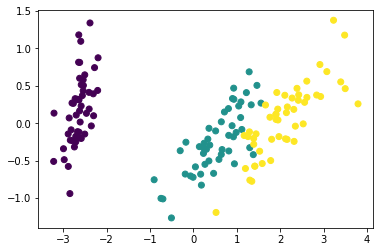

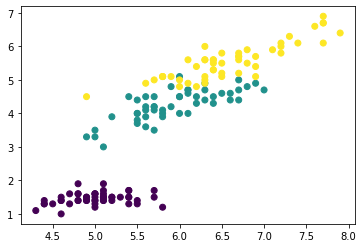

In [37]:
plt.figure()
plt.scatter(Z[:,0],Z[:,1],c=data['target'])
plt.figure()
plt.scatter(X[:,0],X[:,2],c=data['target'])

In [44]:
n = Z.shape[0]
dem = np.zeros([n,n])
for i in range(0,n):
  for j in range(i+1,n):
    dem[i,j] = np.linalg.norm(Z[i,:]-Z[j,:])
    dem[j,i] = dem[i,j]

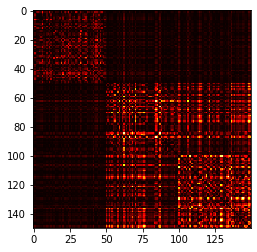

In [51]:
dif = dem - D
np.abs(dif).max()
plt.imshow(np.abs(dif), cmap='hot', interpolation='nearest')
plt.show()

In [48]:
dif

array([[ 0.        , -0.04121134, -0.00237119, ..., -0.00485081,
        -0.06125771, -0.02149121],
       [-0.04121134,  0.        , -0.12223766, ..., -0.01309854,
        -0.09363567, -0.04762158],
       [-0.00237119, -0.12223766,  0.        , ..., -0.00282946,
        -0.05164195, -0.0174423 ],
       ...,
       [-0.00485081, -0.01309854, -0.00282946, ...,  0.        ,
        -0.47472004, -0.12003374],
       [-0.06125771, -0.09363567, -0.05164195, ..., -0.47472004,
         0.        , -0.11980909],
       [-0.02149121, -0.04762158, -0.0174423 , ..., -0.12003374,
        -0.11980909,  0.        ]])

In [34]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X)

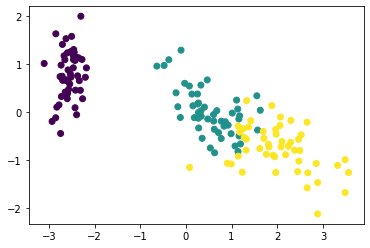

In [35]:
plt.scatter(X_transformed[:,0],X_transformed[:,1],c=data['target'])